In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import urllib.request as url 
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string

## Train

In [2]:
final = pd.read_csv('final_train_data.csv')

In [3]:
final.head()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...


In [4]:
final['lemma_data'][2][0:100]

"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASHINGTON', 'DC', 'FORM', 'K', 'FISCA"

In [5]:
## The lemmatized words and in a list which is enclosed within a string. 
##So we define a function to convert enclosed list to list.

def convert(list):
    return eval(list)

In [6]:
final['lemma_list'] = final['lemma_data'].apply(lambda x: convert(x))

In [7]:
final.tail(2)

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list
2347,2348,820313,1,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",18409,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2012,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ..."
2348,2349,27904,0,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2016,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."


In [8]:
final.shape

(2349, 9)

## Test

In [9]:
test = pd.read_csv('final_test_data.csv')

In [10]:
test.shape

(856, 8)

In [11]:
test.head()

,Unnamed: 0,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
0,0,0,40533,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",41108,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
1,1,1,36270,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",37429,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",1999,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
2,2,2,315852,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",29882,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",2001,TABLE OF CONTENTS SECURITIES AND EXCHANGE COMM...
3,3,3,920148,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",43991,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2009,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
4,4,4,96021,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",28766,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2004,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...


In [12]:
test.tail()

,Unnamed: 0,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
851,421,851,101829,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",18992,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2014,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
852,422,852,101778,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",62174,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",2005,USE THESE LINKS TO RAPIDLY REVIEW THE DOCUMENT...
853,423,853,879101,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",56179,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2013,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
854,424,854,849399,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",47351,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
855,425,855,63276,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",52851,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2011,TABLE OF CONTENTS UNITED STATES SECURITIES AND...


In [13]:
test['lemma_list'] = test['lemma_data'].apply(lambda x: convert(x))

## Vectorize the lemmatized text using TF-IDF

In [15]:
auditor = pd.read_csv('StopWords_Auditor.txt', header = None)
currency = pd.read_csv('StopWords_Currencies.txt', header = None, encoding = 'unicode_escape')
date_num = pd.read_csv('StopWords_DatesandNumbers.txt',header = None, encoding = 'unicode_escape')
gen = pd.read_csv('StopWords_Generic.txt', header = None, encoding = 'unicode_escape')
geo = pd.read_csv('StopWords_Geographic.txt', header = None, encoding = 'unicode_escape')
names = pd.read_csv("StopWords_Names.txt", header = None, encoding = 'unicode_escape')

stopwords_df = pd.concat([currency, date_num, gen, geo, names, auditor])

print(stopwords_df.shape)

stopwords_list = stopwords_df[0].tolist()

print(stopwords_list[0:100])

(13536, 1)
['AFGHANI', 'ARIARY', 'BAHT', 'BALBOA', 'BIRR', 'BOLIVAR', 'BOLIVIANO', 'CEDI', 'COLON', 'CÓRDOBA', 'DALASI', 'DENAR', 'DINAR', 'DIRHAM', 'DOBRA', 'DONG', 'DRAM', 'ESCUDO', 'EURO', 'FLORIN', 'FORINT', 'GOURDE', 'GUARANI', 'GULDEN', 'HRYVNIA', 'KINA', 'KIP', 'KONVERTIBILNA MARKA', 'KORUNA', 'KRONA', 'KRONE', 'KROON', 'KUNA', 'KWACHA', 'KWANZA', 'KYAT', 'LARI ', 'LATS', 'LEK', 'LEMPIRA', 'LEONE', 'LEU', 'LEV', 'LILANGENI', 'LIRA', 'LITAS', 'LOTI', 'MANAT', 'METICAL', 'NAIRA', 'NAKFA', 'NEW LIRA', 'NEW SHEQEL', 'NGULTRUM', 'NUEVO SOL', 'OUGUIYA', 'PATACA', 'PESO', 'POUND', 'PULA ', 'QUETZAL', 'RAND', 'REAL', 'RENMINBI', 'RIAL', 'RIEL', 'RINGGIT', 'RIYAL', 'RUBLE', 'RUFIYAA', 'RUPEE', 'RUPEE', 'RUPIAH', 'SHILLING', 'SOM', 'SOMONI', 'SPECIAL DRAWING RIGHTS', 'TAKA', 'TALA', 'TENGE', 'TUGRIK', 'VATU', 'WON', 'YEN', 'ZLOTY', 'HUNDRED  ', 'THOUSAND', 'MILLION', 'BILLION', 'TRILLION', 'DATE ', 'ANNUAL', 'ANNUALLY', 'ANNUM', 'YEAR', 'YEARLY', 'QUARTER', 'QUARTERLY', 'QTR', 'MONTH']


In [16]:
# stop_words_removed = []
# for tokenized_words in df['token_data']:
    
#     stop_words_removed.append([word for word in tokenized_words if word not in stopset])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer()

### Train

In [19]:
vectorizer.fit(final['lemma'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
final_tf_idf = vectorizer.transform(final['lemma'])

In [21]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [22]:
final_tf_idf.shape

(2349, 93180)

In [23]:
Dense_mat = final_tf_idf.todense()

In [24]:
Tfidf_df = pd.DataFrame(Dense_mat, columns=vectorizer.get_feature_names())

In [25]:
Tfidf_df.shape

(2349, 93180)

In [26]:
tf_idf = Tfidf_df.reset_index()

In [27]:
tf_idf.head(3)

,level_0,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,aaasf,aaasuperior,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,0.001035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data = pd.merge(final, tf_idf, left_on='Unnamed: 0', right_on='level_0')

In [29]:
data.shape

(2348, 93190)

In [30]:
data.head(2)

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,level_0,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test

In [31]:
tfidf_test = vectorizer.transform(test['lemma'])

In [32]:
type(tfidf_test)

scipy.sparse.csr.csr_matrix

In [33]:
tfidf_test.shape

(856, 93180)

In [34]:
test_dense_mat = tfidf_test.todense()
#test_Tfidf_df = pd.DataFrame(test_dense_mat, columns=vectorizertest.get_feature_names())

In [35]:
test_Tfidf_df = pd.DataFrame(test_dense_mat, columns=vectorizer.get_feature_names())

In [36]:
test_Tfidf_df.tail()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,aaasf,aaasuperior,aaav,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test_tf_idf = test_Tfidf_df.reset_index()

In [38]:
test_tf_idf.tail(2)

,level_0,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,aaasf,aaasuperior,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
854,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
test_data = pd.merge(test, test_tf_idf, left_on='id', right_on='level_0')

In [40]:
test_data.head()

,Unnamed: 0,id_x,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,level_0,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,0,40533,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",41108,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,36270,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",37429,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",1999,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,315852,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",29882,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",2001,TABLE OF CONTENTS SECURITIES AND EXCHANGE COMM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,920148,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",43991,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2009,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,96021,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",28766,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2004,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing the dataframe for modelling

### Train

In [41]:
df = data.drop(columns = ['Unnamed: 0', 'cik', 'sw_rem_data', 'lemma_data','lemma', 'lemma_list', 'level_0'])

In [42]:
df.head(3)

,long_term_outlook,word_count_sw_rem,filing_year,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,1,30809,2000,0.001035,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,20607,2008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,17325,2009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.dtypes

long_term_outlook      int64
word_count_sw_rem      int64
filing_year            int64
aa                   float64
aaa                  float64
aaaa                 float64
aaaaa                float64
aaaaaa               float64
aaaaaaaaa            float64
aaaamendment         float64
aaasf                float64
aaasuperior          float64
aaav                 float64
aabb                 float64
aabf                 float64
aac                  float64
aachen               float64
aacp                 float64
aacps                float64
aacquired            float64
aacr                 float64
aad                  float64
aadvantage           float64
aaffiliate           float64
aafrica              float64
aag                  float64
aah                  float64
aahru                float64
aai                  float64
aaik                 float64
                      ...   
zydelig              float64
zyderm               float64
zydis                float64
zydus         

In [135]:
df.to_csv('Train_Tfidf_Final.csv')

### Test

In [44]:
test_df = test_data.drop(columns = ['Unnamed: 0', 'cik', 'sw_rem_data', 'lemma_data','lemma', 'lemma_list', 'level_0'])

In [45]:
test_df.tail()

,id_x,word_count_sw_rem,filing_year,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
851,851,18992,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,852,62174,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,853,56179,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,854,47351,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,855,52851,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
test_df.shape

(856, 93183)

In [134]:
test_df.to_csv('Test_Tfidf_final.csv')

## Splitting dataframe

In [47]:
from sklearn.model_selection import train_test_split

### Train

In [48]:
X = df.drop(columns = 'long_term_outlook')
y = df['long_term_outlook']

In [49]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [50]:
print('X Train dimensions: \n\n', x_train.shape, '\n\nX Validation dimensions: \n\n', x_val.shape, 
      '\n\nY Train dimensions:\n\n', y_train.shape, '\n\n Y Validation dimensions: \n\n', y_val.shape)

X Train dimensions: 

 (1878, 93182) 

X Validation dimensions: 

 (470, 93182) 

Y Train dimensions:

 (1878,) 

 Y Validation dimensions: 

 (470,)


### Test

In [51]:
x_test = test_df.drop(columns = ['id_x'])

In [52]:
x_test.head(2)

,word_count_sw_rem,filing_year,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,aaasf,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,41108,2012,0.003927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37429,1999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

### Load Error Metrics

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_curve,log_loss,auc

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegressionCV
logreg_cv = LogisticRegressionCV(cv = 10, random_state=0, class_weight = 'balanced')
from sklearn import metrics
%matplotlib inline

In [55]:
import matplotlib.pyplot as plt

#### Train and Validation

In [56]:
logreg_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [57]:
y_log_pred = logreg_cv.predict(x_val)
y_log_train = logreg_cv.predict(x_train)

In [58]:
y_log_val_proba = logreg_cv.predict_proba(x_val)[::,1]

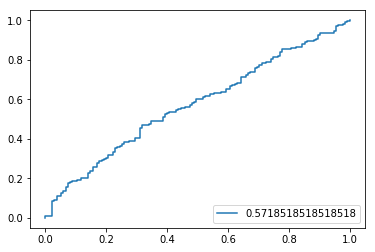

In [59]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_log_val_proba)
auc = metrics.roc_auc_score(y_val, y_log_val_proba)
plt.plot(fpr,tpr,label = str(auc))
plt.legend(loc=4)
plt.show()

AUC is 0.45, it means model has no class separation capacity.

In [60]:
### Train Data Accuracy - Log Reg
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_log_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_log_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_log_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_log_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_log_train, pos_label=1)/2 + f1_score(y_train, y_log_train, pos_label=1)/2)

### Val Data Accuracy - Log Reg
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_log_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_log_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_log_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_log_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_log_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2)



 TRAIN DATA METRICS



 Confusion Matrix

 [[329 212]
 [537 800]]



 Accuracy Score

 0.601171458998935



 F1 Score for Class 0

 0.46766169154228854



 F1 Score for Class 1

 0.6811409110259685



 Average F1 Score

 0.6811409110259685

 VALIDATION DATA METRICS



 Confusion Matrix

 [[ 82  53]
 [164 171]]



 Accuracy Score

 0.5382978723404256



 F1 Score for Class 0

 0.4304461942257218



 F1 Score for Class 1

 0.6118067978533096



 Average F1 Score

 0.6118067978533096


#### Test

In [61]:
y_log_test = logreg_cv.predict(x_test)

In [62]:
log_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_log_test}

log_pred_file = pd.DataFrame(log_pred_file)

log_pred_file.to_csv('Logistic_Regression_Prediction.csv', index = False)

### Naive Bayes


#### Load Algorithm

In [63]:
from sklearn.naive_bayes import MultinomialNB

#### Train and Validation

In [64]:
NBmodel = MultinomialNB().fit(x_train, y_train)

y_NB_pred = NBmodel.predict(x_val)
y_NB_train = NBmodel.predict(x_train)


In [65]:
### Train Data Accuracy - NB
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_NB_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_NB_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_NB_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_NB_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_NB_train, pos_label=1)/2 + f1_score(y_train, y_NB_train, pos_label=1)/2)

### Val Data Accuracy - NB
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_NB_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_NB_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_NB_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_NB_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_NB_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[   0  541]
 [   0 1337]]



 Accuracy Score

 0.7119275825346113



 F1 Score for Class 0

 0.0



 F1 Score for Class 1

 0.8317262830482115



 Average F1 Score

 0.8317262830482115

 VALIDATION DATA METRICS



 Confusion Matrix

 [[  0 135]
 [  0 335]]



 Accuracy Score

 0.7127659574468085



 F1 Score for Class 0

 0.0



 F1 Score for Class 1

 0.8322981366459626



 Average F1 Score

 0.7220524672496361


C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test

In [66]:
y_NB_test = NBmodel.predict(x_test)

In [67]:
NB_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_NB_test}

NB_pred_file = pd.DataFrame(NB_pred_file)

NB_pred_file.to_csv('Naive_Bayes_Prediction.csv', index = False)

### Linear Support Vector Machine

#### Load Algorithm

In [68]:
from sklearn import svm

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
#Create a svm Classifier
clf = svm.SVC(class_weight='balanced') # Linear Kernel

In [71]:
#Train the model using the training sets
clf.fit(x_train, y_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
#Predict the response for train & Validation dataset
y_SVMclf_pred = clf.predict(x_val)
y_SVMclf_train = clf.predict(x_train)

In [73]:
### Train Data Accuracy - SVM
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_SVMclf_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_SVMclf_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_SVMclf_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_SVMclf_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_SVMclf_train, pos_label=1, labels=np.unique(y_train))/2 + f1_score(y_train, y_SVMclf_train, pos_label=1, labels=np.unique(y_train))/2)

### Val Data Accuracy - SVM
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_SVMclf_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_SVMclf_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=1)/2 + f1_score(y_val, y_SVMclf_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[362 179]
 [472 865]]



 Accuracy Score

 0.6533546325878594



 F1 Score for Class 0

 0.5265454545454545



 F1 Score for Class 1

 0.7265854682906342



 Average F1 Score

 0.7265854682906342

 VALIDATION DATA METRICS



 Confusion Matrix

 [[ 53  82]
 [143 192]]



 Accuracy Score

 0.5212765957446809



 F1 Score for Class 0

 0.32024169184290036



 F1 Score for Class 1

 0.6305418719211823



 Average F1 Score

 0.6305418719211823


#### Test

In [74]:
y_SVMclf_test = clf.predict(x_test)

In [75]:
SVM_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_SVMclf_test}

SVM_pred_file = pd.DataFrame(SVM_pred_file)

SVM_pred_file.to_csv('SVM_Prediction.csv', index = False)

### Decision Tree


#### Load Algorithm

In [76]:
from sklearn import tree
import matplotlib.pyplot as plt


In [77]:
DT_classifier = tree.DecisionTreeClassifier(random_state=2, criterion = 'entropy')

#### Validation 

In [78]:
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

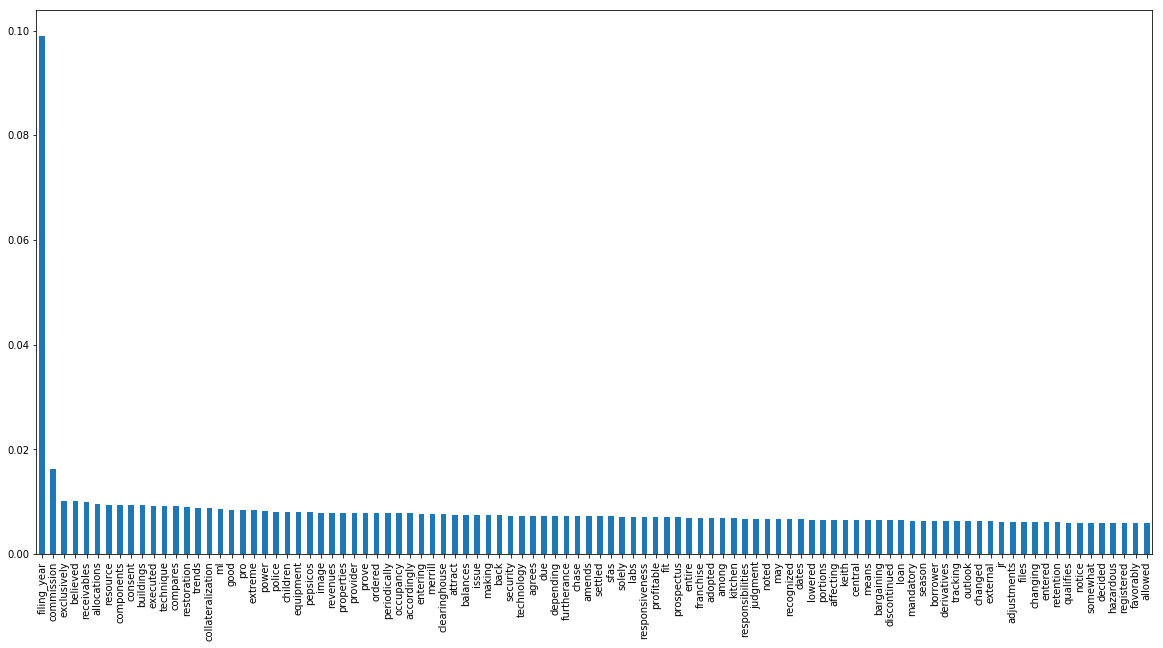

In [79]:
imp_feature = pd.Series(DT_classifier.feature_importances_, index = x_train.columns)
imp_ordered = imp_feature.nlargest(100)
plt.rcParams['figure.figsize'] = (20,10)
imp_ordered.plot(kind = 'bar')

In [80]:
print('\n\n6 Most important feautures: \n\n', imp_ordered.head(2))
print('=========================================')
print('\n\n6 Least important features: \n\n',imp_ordered.tail(2))



6 Most important feautures: 

 filing_year    0.098887
commission     0.016228
dtype: float64


6 Least important features: 

 favorably    0.005918
allowed      0.005847
dtype: float64


In [81]:
y_DT_pred = DT_classifier.predict(x_val)
y_DT_train = DT_classifier.predict(x_train)

In [82]:
### Train Data Accuracy - DT
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_DT_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_DT_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_DT_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_DT_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_DT_train, pos_label=1)/2 + f1_score(y_train, y_DT_train, pos_label=1)/2)

### Val Data Accuracy - DT
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_DT_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_DT_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_DT_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_DT_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_DT_pred, pos_label=1)/2 + f1_score(y_val, y_DT_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[ 541    0]
 [   0 1337]]



 Accuracy Score

 1.0



 F1 Score for Class 0

 1.0



 F1 Score for Class 1

 1.0



 Average F1 Score

 1.0

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[ 50  85]
 [ 75 260]]



 Accuracy Score

 0.6595744680851063



 F1 Score for Class 0

 0.3846153846153846



 F1 Score for Class 1

 0.7647058823529411



 Average F1 Score

 0.7647058823529411


#### Test

In [83]:
y_DT_test = DT_classifier.predict(x_test)

In [84]:
DT_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_DT_test}

DT_pred_file = pd.DataFrame(DT_pred_file)

DT_pred_file.to_csv('Decision_Tree_Prediction.csv', index = False)

### Random Forest

#### Load ALgorithm

In [85]:
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


#### Train and Validation

In [86]:
RF_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=2)

param_grid = {'n_estimators' : [5,7,9,11,13,15,17,19],
             'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
              "min_samples_leaf" : [5, 10, 15, 20],
              "class_weight" : ['balanced','balanced_subsample']}

In [ ]:
# Create regularization penalty space
#penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
#C = uniform(loc=0, scale=4)

# Create hyperparameter options
#hyperparameters = dict(C=C, penalty=penalty)

In [87]:
rfc_cv = RandomizedSearchCV(estimator=RF_classifier, param_distributions=param_grid, n_iter=10,cv=4)


In [88]:
rfc_cv.fit(x_train, y_train)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [5, 7, 9, 11, 13, 15, 17, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [89]:
rfc_cv.best_params_


{'n_estimators': 17,
 'min_samples_leaf': 10,
 'max_depth': 11,
 'class_weight': 'balanced_subsample'}

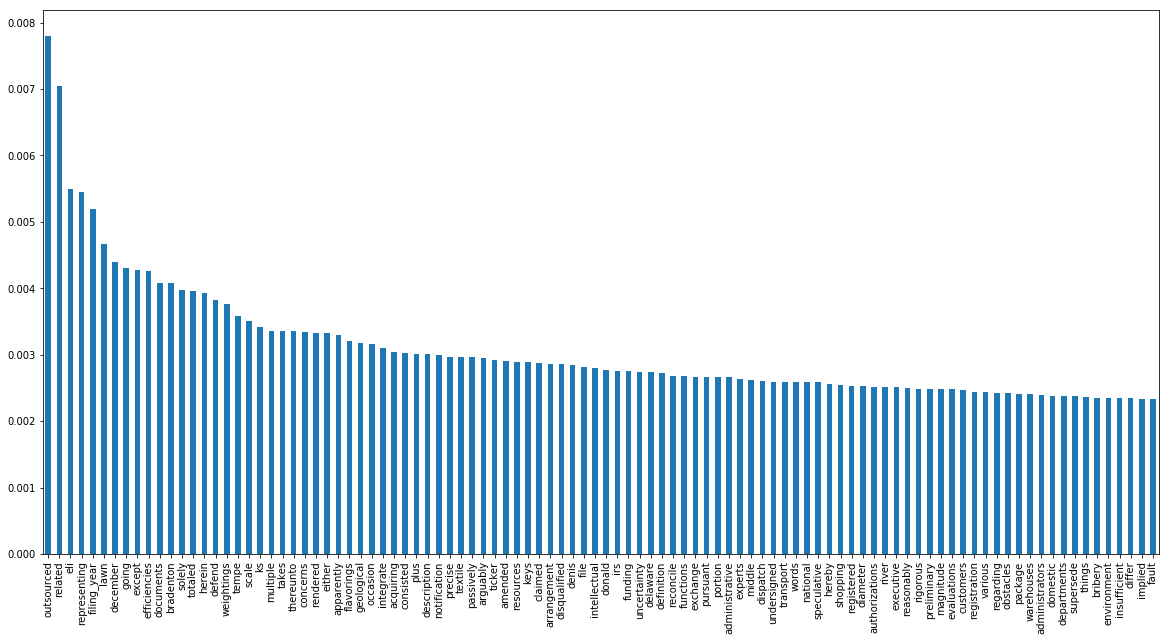

In [90]:
feat_importances = pd.Series(rfc_cv.best_estimator_.feature_importances_, index = x_train.columns)
feat_importances_ordered = feat_importances.nlargest(100)
feat_importances_ordered.plot(kind='bar')

In [93]:
rf_clf = RandomForestClassifier(n_estimators = 17, min_samples_leaf = 10, max_depth = 11, class_weight = 'balanced_subsample', criterion = 'entropy')

In [95]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=17, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [96]:
y_RF_pred = rf_clf.predict(x_val)
y_RF_train = rf_clf.predict(x_train)

In [97]:
### Train Data Accuracy - RF
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_RF_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_RF_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_RF_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_RF_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_RF_train, pos_label=1)/2 + f1_score(y_train, y_RF_train, pos_label=1)/2)

### Val Data Accuracy - RF
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_RF_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_RF_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_RF_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_RF_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_RF_pred, pos_label=1)/2 + f1_score(y_val, y_RF_pred, pos_label=1)/2)



 TRAIN DATA METRICS



 Confusion Matrix

 [[ 412  129]
 [ 190 1147]]



 Accuracy Score

 0.8301384451544196



 F1 Score for Class 0

 0.720909886264217



 F1 Score for Class 1

 0.8779181017986988



 Average F1 Score

 0.8779181017986988

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[ 45  90]
 [ 93 242]]



 Accuracy Score

 0.6106382978723405



 F1 Score for Class 0

 0.32967032967032966



 F1 Score for Class 1

 0.7256371814092953



 Average F1 Score

 0.7256371814092953


#### Test

In [98]:
y_RF_test = rf_clf.predict(x_test)

In [99]:
RF_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_RF_test}

RF_pred_file = pd.DataFrame(RF_pred_file)

RF_pred_file.to_csv('Random_Forest_Prediction.csv', index = False)

### Stacking

#### Load Algorithm

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Train and Validation

In [101]:
#Decision Tree

dtc = DecisionTreeClassifier()

In [124]:
dtc.fit(x_train,y_train)

y_stac_DT_pred = dtc.predict(x_val)
y_stac_DT_train = dtc.predict(x_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
len(y_stac_DT_train)

1878

In [103]:
#Logistic regression

lrc = LogisticRegression()

In [125]:
lrc.fit(x_train,y_train)

y_stac_lrc_pred = lrc.predict(x_val)
y_stac_lrc_train = lrc.predict(x_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
# SVM
clf = svm.SVC(kernel='linear')

In [126]:
clf.fit(x_train,y_train)

# y_stac_SVM_pred = clf.predict(x_val)
# y_stac_SVM_train = clf.predict(x_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

##### Stacking

In [107]:
stack_val = pd.DataFrame([y_stac_DT_pred,y_stac_lrc_pred, y_stac_SVM_pred])
stack_train = pd.DataFrame([y_stac_DT_train,y_stac_lrc_train, y_stac_SVM_train])


In [108]:
print(stack_val.head())

   0    1    2    3    4    5    6    7    8    9    ...  460  461  462  463  \
0    1    1    1    1    1    1    0    1    1    1  ...    1    1    0    0   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   464  465  466  467  468  469  
0    0    1    1    1    1    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  

[3 rows x 470 columns]


In [109]:
stack_val = stack_val.T
stack_train = stack_train.T

In [110]:
stack_val.columns = ['y_stac_DT_pred','y_stac_lrc_pred', 'y_stac_SVM_pred']
stack_train.columns = ['y_stac_DT_train','y_stac_lrc_train', 'y_stac_SVM_pred']

In [111]:
print(stack_val.shape)
print(stack_train.shape)

(470, 3)
(1878, 3)


In [118]:
stack = LogisticRegression()

In [119]:
stack.fit(stack_train,y_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
y_stacked_pred_val = stack.predict(stack_val)
y_stacked_pred_train = stack.predict(stack_train)

In [122]:
### Train Data Accuracy - Stacking
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_stacked_pred_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_stacked_pred_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_stacked_pred_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_stacked_pred_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_stacked_pred_train, pos_label=1)/2 + f1_score(y_train, y_stacked_pred_train, pos_label=1)/2)

### Val Data Accuracy - Stacking
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_stacked_pred_val))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_stacked_pred_val))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=1)/2 + f1_score(y_val, y_stacked_pred_val, pos_label=1)/2)


 TRAIN DATA METRICS



 Confusion Matrix

 [[ 541    0]
 [   0 1337]]



 Accuracy Score

 1.0



 F1 Score for Class 0

 1.0



 F1 Score for Class 1

 1.0



 Average F1 Score

 1.0

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[ 54  81]
 [ 89 246]]



 Accuracy Score

 0.6382978723404256



 F1 Score for Class 0

 0.38848920863309355



 F1 Score for Class 1

 0.7432024169184289



 Average F1 Score

 0.7432024169184289


#### Test

In [127]:
#Decision Tree

#dtc = DecisionTreeClassifier()

y_stac_DT_test = dtc.predict(x_test)


#Logistic regression

#lrc = LogisticRegression()

y_stac_lrc_test = lrc.predict(x_test)

#SVM

#clf = svm.SVC(kernel='linear')

y_stac_SVM_test = clf.predict(x_test)


In [129]:
len(y_stac_DT_test)

856

In [131]:
stack_test = pd.DataFrame([y_stac_DT_test, y_stac_lrc_test, y_stac_SVM_test])


print(stack_test.head())

stack_test = stack_test.T

stack_test.columns = ['y_stac_DT_test','y_stac_lrc_test', 'y_stac_SVM_test']

print(stack_test.shape)
#print(stack_train.shape)

#stack = LogisticRegression()

y_stacked_pred_test = stack.predict(stack_test)

print(len(y_stacked_pred_test))

   0    1    2    3    4    5    6    7    8    9    ...  846  847  848  849  \
0    1    1    1    1    1    0    0    0    1    0  ...    1    0    0    0   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   850  851  852  853  854  855  
0    1    1    0    1    1    0  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  

[3 rows x 856 columns]
(856, 3)
856


In [133]:
Stack_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_stacked_pred_test}

Stack_pred_file = pd.DataFrame(Stack_pred_file)

Stack_pred_file.to_csv('Stacking_Prediction.csv', index = False)

## Conclusion

The Average F1 Scores for the algorithms.

In [136]:
final_metrics = {'Logistic_Regression': f1_score(y_val, y_log_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2, 'Naive_Bayes': f1_score(y_val, y_NB_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2, 'SVM' : f1_score(y_val, y_SVMclf_pred, pos_label=1)/2 + f1_score(y_val, y_SVMclf_pred, pos_label=1)/2,'Decision_Tree': f1_score(y_val, y_DT_pred, pos_label=1)/2 + f1_score(y_val, y_DT_pred, pos_label=1)/2,'Random_Forest': f1_score(y_val, y_RF_pred, pos_label=1)/2 + f1_score(y_val, y_RF_pred, pos_label=1)/2, 'Stacking': f1_score(y_val, y_stacked_pred_val, pos_label=1)/2 + f1_score(y_val, y_stacked_pred_val, pos_label=1)/2}

In [137]:
print('**Average F1 score values of different algorithms**: \n')
f1_score = pd.DataFrame(final_metrics, index = [0])
f1_score

**Average F1 score values of different algorithms**: 



,Logistic_Regression,Naive_Bayes,SVM,Decision_Tree,Random_Forest,Stacking
0,0.611807,0.722052,0.630542,0.764706,0.725637,0.743202
